In [4]:
def rev_string(instr):
    return instr[::-1]

teststr = 'ABCDEFGHIJKLMNOP'
print(rev_string(teststr))

PONMLKJIHGFEDCBA


In [6]:
def bayes(A, BifA, BifnotA):
    return (A * BifA) / ((A * BifA) + (1 - A) * BifnotA)

print(bayes(.5, .4, .9))

0.3076923076923077


In [52]:
import pandas as pd
import matplotlib.pyplot as plt

teams_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lahman-teams.csv')
teams_data_1995 = teams_data[teams_data.yearID >= 1995]


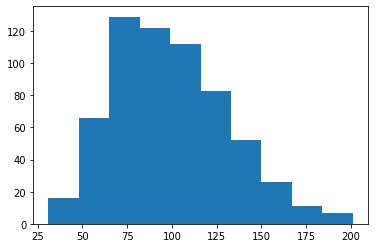

In [25]:
SB_since1995 = plt.hist(teams_data_1995['SB'])
#This appears to follow more of a Poisson distribution

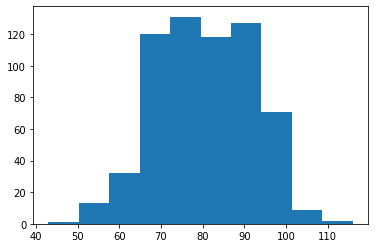

In [27]:
Wins_since1995 = plt.hist(teams_data_1995['W'])
#This appears to follow more of a Gaussian distribution

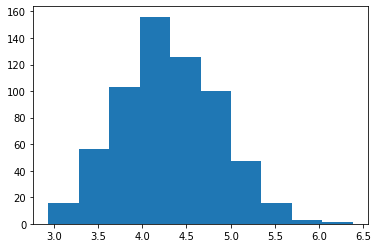

In [29]:
ERA_since1995 = plt.hist(teams_data_1995['ERA'])
#This also appears to follow more of a Gaussian distribution

In [48]:
filtered_data = teams_data_1995.drop(columns=['lgID', 'franchID', 'divID', 'teamID', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'HBP', 'SF', 'park', 'attendance', 'BPF', 'teamIDBR', 'teamIDlahman45', 'teamIDretro', 'H', '2B', '3B', 'BB', 'SO', 'SB', 'CS', 'IPouts', 'Rank', 'G', 'Ghome', 'R', 'AB'])

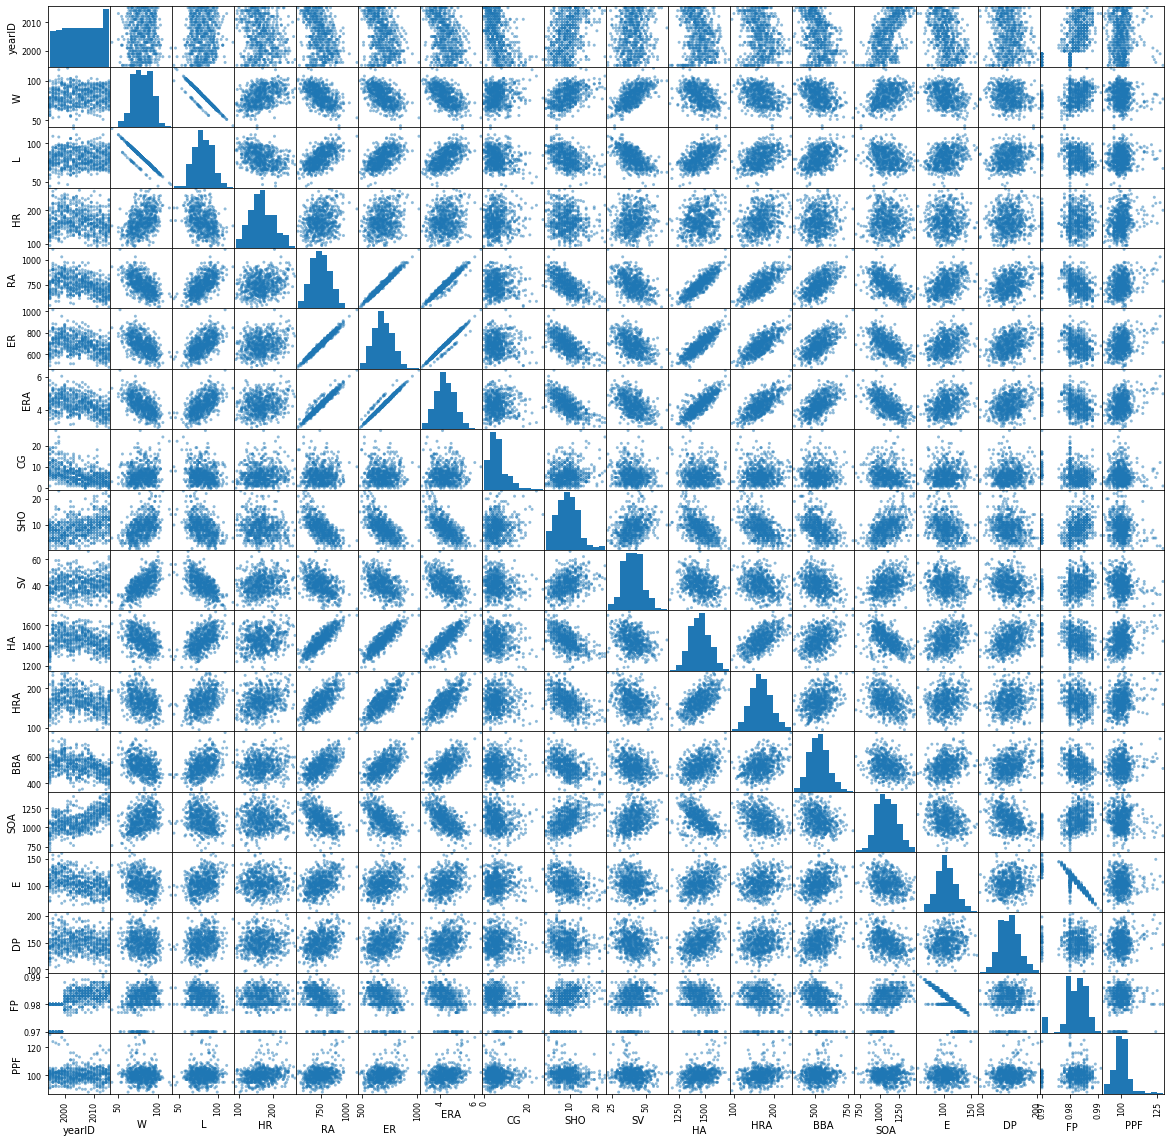

In [50]:
pd.plotting.scatter_matrix(filtered_data, figsize=(20,20))
plt.show()

In [51]:
#Image of Scatter matrix is included in the git repo just in case :)
'''
After iterating through and finding and filtering out the variables with seemingly little to no correlation, I ended with
this scatter matrix that some interesting findings.  Starting with the most obvious ones, ER, ERA and RA all have positive,
strong correlations with each other.  I would presume that's due to the fact that they're essentially three different metrics
to measure the same thing.  Wins and Losses are negative correlated sice each team will play the same number of games.

It was also interesting to see the fielding was affected by the number of errors.  Saves are negatively correlated with Losses,
which is intuitive, but still surprising to see that it's remarkably visible in 20 years worth of data.

Something interesting of note to me, were the factors that seemed to have little to no correlation with whether a team will 
Win or Lose: Errors, Double Plays, Strikeouts. 

Another interesting note was that asside from the completed games, most of the distributions were gaussian. I would say that's
a testament to how pitching has changed in recent decades and fewer and fewer pitchers play a full 9 innings.  the poisson
curve is heavily skewed to the right.
'''

"\nAfter iterating through and finding and filtering out the variables with seemingly little to no correlation, I ended with\nthis scatter matrix that some interesting findings.  Starting with the most obvious ones, ER, ERA and RA all have positive,\nstrong correlations with each other.  I would presume that's due to the fact that they're essentially three different metrics\nto measure the same thing.  Wins and Losses are negative correlated sice each team will play the same number of games.\n\nIt was also interesting to see the fielding was affected by the number of errors.  Saves are negatively correlated with Losses,\nwhich is intuitive, but still surprising to see that it's remarkably visible in 20 years worth of data.\n\nSomething interesting of note to me, were the factors that seemed to have little to no correlation with whether a team will \nWin or Lose: Errors, Double Plays, Strikeouts. \n\nAnother interesting note was that asside from the completed games, most of the distribu

In [59]:
results_CG = []
results_SV = []
n = 1000
for i in range(n):
    results_CG.append(teams_data_1995['CG'].sample(100).mean())
    results_SV.append(teams_data_1995['SV'].sample(100).mean())

df_CG = pd.DataFrame({'Completed Games' : results_CG})
df_SV = pd.DataFrame({'Saved Games' : results_SV})

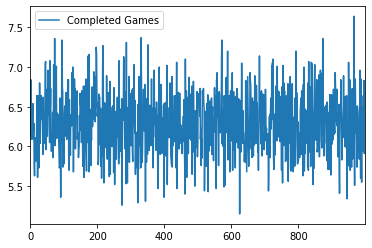

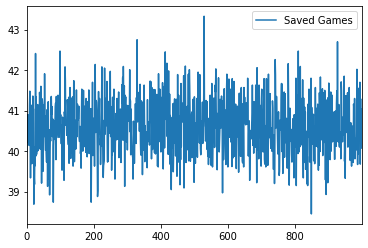

In [62]:
df_CG.plot()
df_SV.plot()

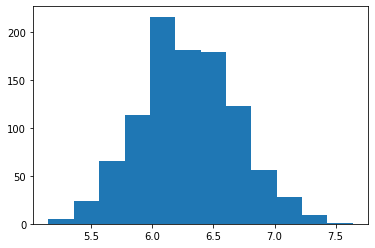

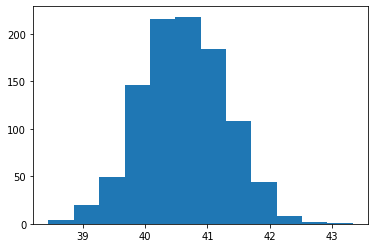

In [79]:
hist_CG = plt.hist(results_CG, bins=12)
plt.show()
hist_SV = plt.hist(results_SV, bins=12)
plt.show()